In [ ]:
import yaml
from transformers import AutoTokenizer
from data_processor import SplittedJsonIoDataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load configuration file
with open("config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=config["model_loading_args"]["model_name"],
    token = "")

# Load dataset
dataset = SplittedJsonIoDataset(tokenizer, config).create()

In [14]:
def count_tokens(example):
    example["num_tokens"] = len(tokenizer.tokenize(example["text"]))
    return example

dataset = dataset.map(count_tokens)

num_train_tokens =  np.array(dataset["train"]["num_tokens"])
num_eval_tokens =  np.array(dataset["eval"]["num_tokens"])

Map: 100%|██████████| 207/207 [00:05<00:00, 40.44 examples/s]


### Number of tokens in training set

In [16]:
pd.Series(num_train_tokens).describe()

count     1564.000000
mean     18992.346547
std      13137.990122
min       1763.000000
25%       9623.000000
50%      15222.500000
75%      24882.750000
max      81405.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of tokens per example in training set')

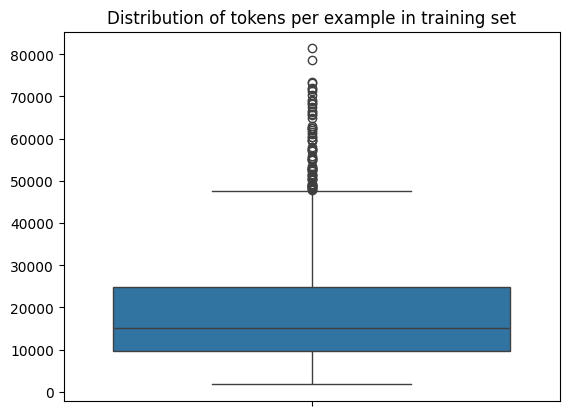

In [19]:
sns.boxplot(num_train_tokens)
plt.title('Distribution of tokens per example in training set')

### Number of tokens in validation set

In [20]:
pd.Series(num_eval_tokens).describe()

count      207.000000
mean     20315.009662
std      12793.700242
min       2018.000000
25%      10364.000000
50%      17236.000000
75%      27280.500000
max      66432.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of tokens per example in validation set')

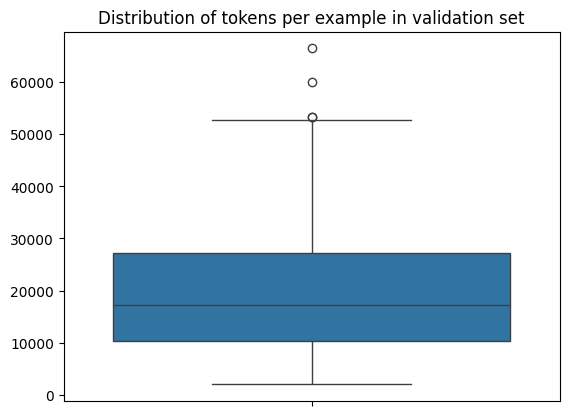

In [21]:
sns.boxplot(num_eval_tokens)
plt.title('Distribution of tokens per example in validation set')